# **Data Science & Business Analytics Internship**

# **Name : ATANU WADHWA**

# **Task 1**

## **Prediction using Supervised ML:**

The task is to predict the percentage of an student based on the no. of study hours.


### **Importing the necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### **Reading the data**

In [4]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported.")

Data imported.


In [5]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Visualising the data**

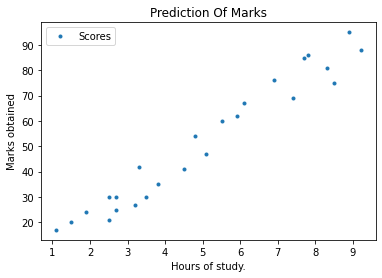

In [7]:
dataset.plot(x='Hours', y='Scores', style='.')
plt.title('Prediction Of Marks')
plt.xlabel('Hours of study.')
plt.ylabel('Marks obtained')
plt.show()

### **Training the model**

In [8]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)
Model1=LinearRegression()
Model1.fit(X_train.reshape(-1,1), Y_train)
print("Model is trained")

Model is trained


### **Plotting The Prediction Line (Line of Regression)**

In [10]:
print(Model1.intercept_)
print(Model1.coef_)

2.018160041434683
[9.91065648]


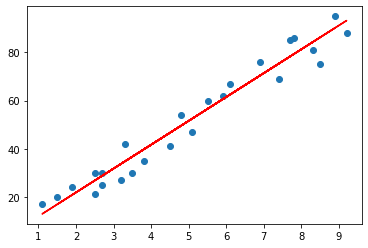

In [11]:
line = Model1.coef_*X+Model1.intercept_

plt.scatter(X,Y)
plt.plot(X,line,color="red");
plt.show()

### **Predictions And Comparisons**

In [12]:
print(X_test) 
Y_pred = Model1.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparison of Orignal vs Predicted Values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
print('Training score:', Model1.score(X_train, Y_train))
print('Test score:', Model1.score(X_test, Y_test))

Training score: 0.9515510725211552
Test score: 0.9454906892105356


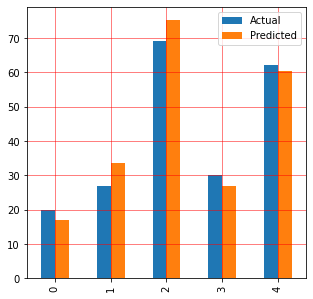

In [15]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='yellow')
plt.show()

### Predicted score if a student studies 9.25 hours/day?

In [16]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=Model1.predict(test)
print("Number of Hours={}".format(hours))
print("Predicted Marks={}".format(own_pred[0]))

Number of Hours=9.25
Predicted Marks=93.69173248737538


### **Final Analysis**

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
